[[135 141 147 ... 150 141 147]
 [147 147 147 ... 141 145 147]
 [145 147 145 ... 133 135 141]
 ...
 [141 147 143 ... 154 161 161]
 [152 156 156 ... 154 152 154]
 [159 164 161 ... 159 156 159]]
[[153. 149. 143. ... 122. 140. 161.]
 [153. 127. 161. ... 139. 117. 117.]
 [129. 176. 155. ... 156. 135. 156.]
 ...
 [177. 162. 151. ... 138. 177. 143.]
 [143. 115. 154. ... 149. 138. 179.]
 [161. 175. 131. ... 188. 141. 135.]]


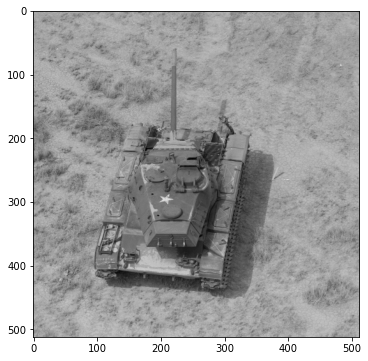

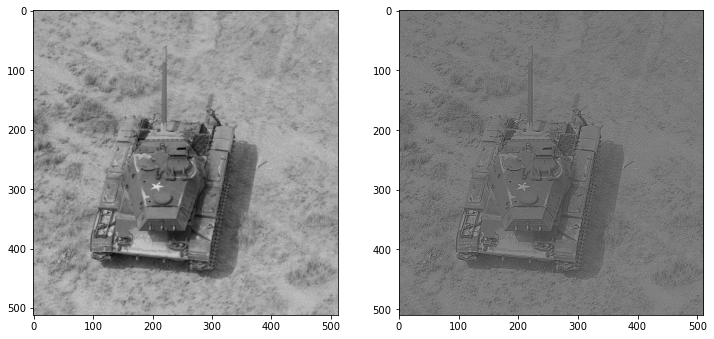

In [38]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

img = Image.open('image.tiff')
img = ImageOps.grayscale(img)
# img = img.resize(size=(224, 224))
plot_image(img=img)

sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])


def calculate_target_size(img_size: int, kernel_size: int) -> int:            
    return img_size - kernel_size + 1

def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img
img=np.array(img)
img_sharpened = convolve(img=np.array(img), kernel=sharpen)
plot_two_images(
    img1=img, 
    img2=img_sharpened
)
# print(img_sharpened)
mat = img[0:3, 0:3]            
convolved_img = np.multiply(mat, sharpen)
print(img)
print(img_sharpened)
# img_blurred = convolve(img=np.array(img), kernel=blur)
# plot_two_images(
#     img1=img, 
#     img2=img_blurred
# )

In [ ]:
# import cv2 as cv
import numpy as np
import copy
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def convolution_1(img, i, j):
    sharpen = np.array([
                        [0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]
                    ])
#     print(np.multiply(img[i:i+3, j:j+3], sharpen))
    val = np.sum(np.multiply(img[i:i+3, j:j+3], sharpen))
    return val

def Laplacian_filter_1(img, img_size, ksize):
    temp = np.zeros(shape = (img_size - ksize + 1, img_size - ksize + 1))
    for i in range(img_size - ksize + 1):
        for j in range(img_size - ksize + 1):
            temp[i][j] = convolution_1(img, i, j)
    # cv.imshow(f"Laplacian filtered Image 1 {ksize} x {ksize}", temp)
    return temp


img = Image.open('image.tiff')
img = ImageOps.grayscale(img)
img.resize(size=(512, 512))
plt.figure(figsize=(6, 6))
img = np.array(img)
# print(img)
plt.imshow(img, cmap='gray')
img1 = Laplacian_filter_1(img, len(img) , 3)
plt.imshow(img1, cmap='gray')
for i in range(len(img1)):
    for j in range(len(img1[0])):
        print(img1[i][j], end = " ")
    print()
# convolution_1(img,0,0)
# img = cv.imread('image.tiff')
# cv.imshow("IMAGE" ,img)
# # print(img)
# print(img[0:3, 0:3, 0])
# val = convolution_1(img[:,:,0], 0, 0)
# print(val)
# print(img1[0][0])
# cv.waitKey(0)       
# cv.destroyAllWindows()


In [13]:
pip install opencv

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
